In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import quantumpropagator as qp
from quantumpropagator import readWholeH5toDict, abs2
#from __future__ import print_function
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

def heatThis(h5File,gams,thes,vmaxV,save=None):
    save = save or False
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    wf   = qp.retrieve_hdf5_data(h5File,'WF')
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.title('Time = {:10.5f} fs'.format(time))
    plt.xlabel('Gamma')
    plt.ylabel('Theta')
    
    # this is to get a nice colorbar on the side
    ax = plt.gca()
    aaa = np.rad2deg
    ext = [aaa(gams[0]),aaa(gams[-1]),aaa(thes[0])*2,aaa(thes[-1])*2]
    im = ax.imshow(qp.abs2(wf), extent=ext, cmap='hot', vmax=vmaxV)
    #im = ax.imshow(qp.abs2(wf), cmap='PuBu_r', vmax=0.4)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)
    
    if save:
        fig.savefig(os.path.splitext(h5File)[0] + '.png')
        plt.close()
    
def f(x):
    return heatThis(os.path.join(a,filesList[x]),gams,thes,vmaxV)

In [2]:
subfolders = sorted([ dir for dir in os.listdir('.') if os.path.isdir(dir) and dir != '.ipynb_checkpoints'])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> input_FinerGrid_0000
1 -> input_FinerGrid_0001
2 -> input_FinerGrid_0002
3 -> input_FinerGrid_0003
4 -> input_FinerGrid_0004
5 -> input_FinerGrid_0005



In [3]:
a = subfolders[-1]

In [4]:
filesList = [ fn for fn in sorted(os.listdir(a)) if fn[:8] == 'Gaussian' and fn[-3:] == '.h5']
outh5 = os.path.join(a,'allInput.h5')
dictio = readWholeH5toDict(outh5)
gams,thes = dictio['gams'],dictio['thes']
lastV = len(filesList)-1
# dictio.keys()
zeroWF = qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')
vmaxV = abs2(zeroWF).max()

In [5]:
interact(f, x = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));
createimages = False

if createimages:
    for filn in filesList:
        filna = os.path.join(a,filn)
        heatThis(filna, gams, thes, vmaxV, save=True)
        

interactive(children=(IntSlider(value=100, description='x'), Output()), _dom_classes=('widget-interact',))

# 1d slices

In [6]:
gamL,theL = (qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')).shape
gamsT = np.rad2deg(gams)
thesT = np.rad2deg(thes)*2

In [7]:
def sliceGammas(h5File, gamma, gamsT):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf[gamma,:]
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    plt.title('Time = {:10.5f} fs --- gammaL = {:8.3f}'.format(time,gamsT[gamma]))
    plt.ylim(-0.5,0.5)
    plt.plot(thesT, np.real(ys), linewidth=1,ls='--')
    plt.plot(thesT, np.imag(ys), linewidth=1,ls='--')
    plt.plot(thesT, abs2(ys), linewidth=3,ls='-')

def sliceThetas(h5File, theta):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf[:,theta]
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    plt.title('Time = {:10.5f} fs --- thetaL = {:8.3f}'.format(time,thesT[theta]))
    plt.ylim(-0.5,0.5)
    plt.plot(gamsT, np.real(ys), linewidth=1,ls='--')
    plt.plot(gamsT, np.imag(ys), linewidth=1,ls='--')
    plt.plot(gamsT, abs2(ys), linewidth=3,ls='-')    
    
def fgam(file_number,gamma):
    return sliceGammas(os.path.join(a, filesList[file_number]), gamma, gamsT)

def fthe(file_number,theta):
    return sliceThetas(os.path.join(a, filesList[file_number]), theta)

In [8]:
interact(fgam, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), gamma = widgets.IntSlider(min=0,max=gamL-1,step=1,value=10));

interactive(children=(IntSlider(value=100, description='file_number'), IntSlider(value=10, description='gamma'…

In [9]:
interact(fthe, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), theta = widgets.IntSlider(min=0,max=theL-1,step=1,value=16));

interactive(children=(IntSlider(value=100, description='file_number'), IntSlider(value=16, description='theta'…

In [10]:
outfn = os.path.join(a,'output')

In [11]:
data = pd.read_csv(outfn, delim_whitespace=True, header=None);
data.columns = ['steps','fs','Norm Deviation','Kinetic','Potential','Total','Total deviation']
data

,steps,fs,Norm Deviation,Kinetic,Potential,Total,Total deviation
0,0,0.000000,0.396577,0.000860,0.001375,0.002235,0.000000e+00
1,100,1.000993,0.396581,0.000968,0.001268,0.002235,6.454296e-08
2,200,2.001985,0.396594,0.001185,0.001050,0.002235,2.394490e-07
3,300,3.002978,0.396612,0.001397,0.000838,0.002235,4.882732e-07
4,400,4.003971,0.396634,0.001519,0.000716,0.002235,7.740499e-07
5,500,5.004964,0.396657,0.001529,0.000705,0.002234,1.067840e-06
6,600,6.005956,0.396679,0.001441,0.000793,0.002234,1.348027e-06
7,700,7.006949,0.396700,0.001285,0.000949,0.002234,1.597554e-06
8,800,8.007942,0.396717,0.001102,0.001132,0.002234,1.802655e-06
9,900,9.008935,0.396730,0.000942,0.001291,0.002233,1.953766e-06


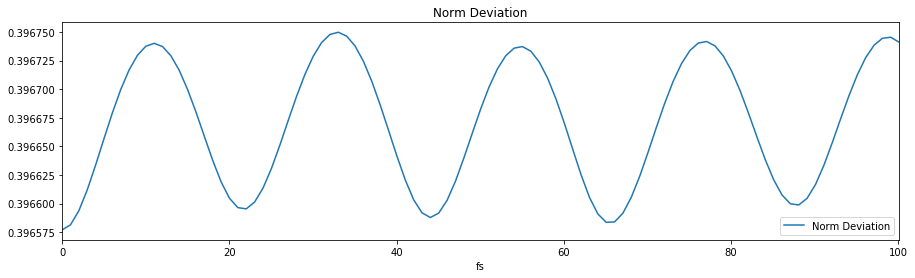

In [12]:
data.plot(title = 'Norm Deviation', x='fs', y = 'Norm Deviation', figsize=(15,4));

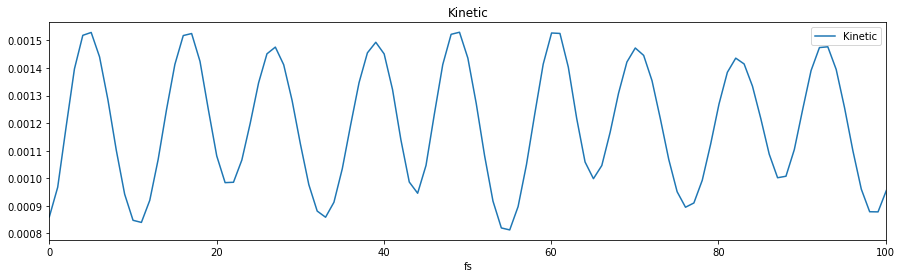

In [13]:
data.plot(title = 'Kinetic', x='fs', y = 'Kinetic', figsize=(15,4));

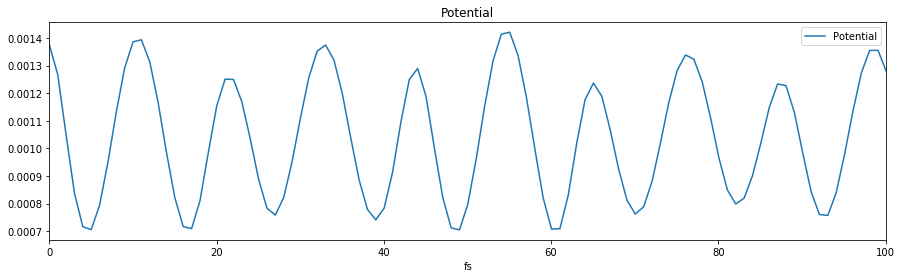

In [14]:
data.plot(title = 'Potential', x='fs', y = 'Potential', figsize=(15,4));

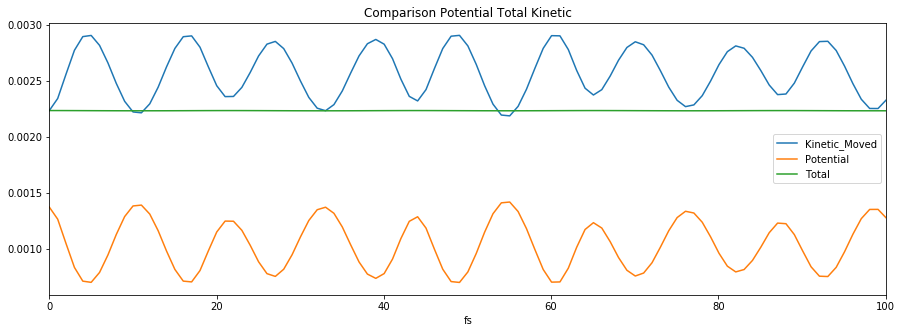

In [15]:
data['Kinetic_Moved'] = data['Kinetic'] + data['Potential'][0]
data.plot(title = 'Comparison Potential Total Kinetic', x=['fs'] ,y=['Kinetic_Moved','Potential','Total'], figsize=(15,5));

### Expected values

In [16]:
def expected(h5file):
    wf  = qp.retrieve_hdf5_data(h5file,'WF')
    wf = wf /np.linalg.norm(wf)
    wfA = abs2(wf)
    gamAvg = np.sum(wfA,axis=1)
    theAvg = np.sum(wfA,axis=0)
    gamA = sum([ gamsT[i] * gamAvg[i] for i in range(gamAvg.size) ])
    theA = sum([ thesT[i] * theAvg[i] for i in range(theAvg.size) ])
    print('Expected Values:\nTheta: {:10.3f} \nGamma: {:10.3f}'.format(theA, gamA))

def fexp(x):
    return expected(os.path.join(a,filesList[x]))

In [17]:
interact(fexp, x = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));

interactive(children=(IntSlider(value=100, description='x'), Output()), _dom_classes=('widget-interact',))

# Initial condition differences

In [18]:
# filesList

In [19]:
wf0  = qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')
wf1  = qp.retrieve_hdf5_data(os.path.join(a,filesList[1]),'WF')

In [20]:
wfdiff = wf1-wf0

In [21]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

def plotWF(wf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    #something I do not like here, as X and Y are not in the order I like...
    X,Y = np.meshgrid(thesT,gamsT)

    ax.plot_wireframe(X, Y, wf.real, alpha=0.3)
    ax.plot_wireframe(X, Y, wf.imag, alpha=0.2, color='orange')
    print(wf.shape)

<IPython.core.display.Javascript object>


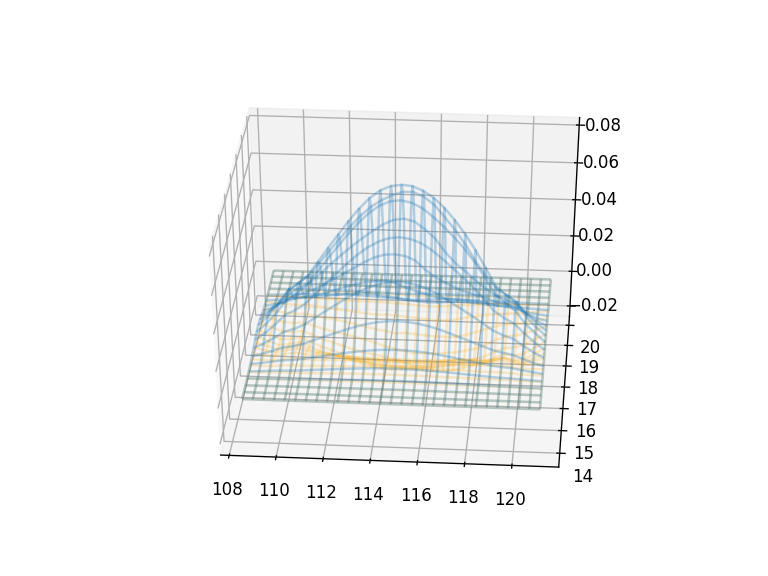

(21, 29)


In [22]:
plotWF(wf1)

<IPython.core.display.Javascript object>


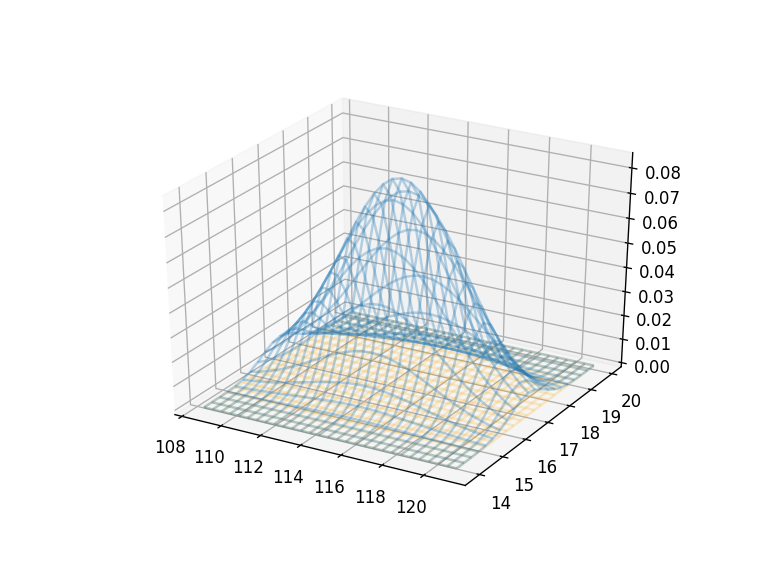

(21, 29)


In [23]:
plotWF(wf0)

<IPython.core.display.Javascript object>


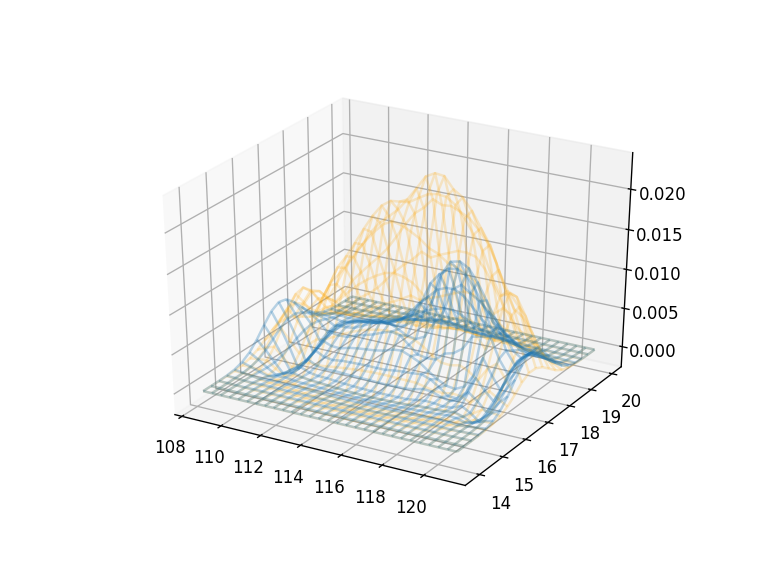

(21, 29)


In [24]:
plotWF(wf0-wf1)